## Basic PET reconstruction example

In [1]:
import occiput 
import numpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1 - Define the characteristics of the generic PET scanner

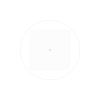

In [2]:
pet = occiput.Reconstruction.PET.PET_Static_Scan() 
pet.set_scanner("Generic") 
pet.binning.N_axial     = 120
pet.binning.N_azimuthal = 1 
pet.binning.size_u      = 300.0
pet.binning.size_v      = 300.0
pet.binning.N_u         = 128
pet.binning.N_v         = 128
pet.binning.angles_axial = linspace(0,180.0-180.0/120,120)
pet.binning.angles_azimuthal = int32([0]) 
pet.binning

### 2- Create a phantom image

In [3]:
phantom = occiput.DataSources.Synthetic.Shapes.uniform_spheres_ring([128,128,128],inner_value=1000.0) 

### 3- Simulate acquisition

In [7]:
prompts = pet.project_activity(phantom, unit="Bq/mm3") 
prompts.data = numpy.random.poisson(prompts.data) 

pet.set_prompts(prompts)
pet.set_sensitivity(ones(prompts.data.shape))

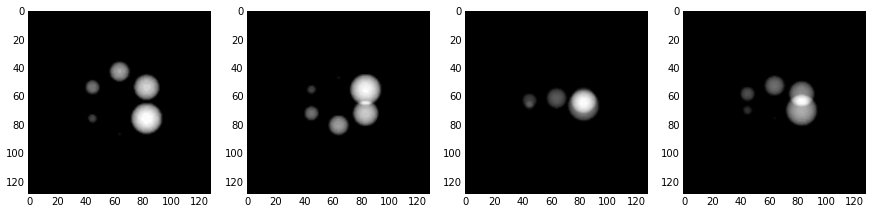

In [8]:
figure(figsize=[15,5]); 
subplot(1,4,1); imshow(prompts.to_nd_array()[0,0,:,:],cmap='gray');
subplot(1,4,2); imshow(prompts.to_nd_array()[10,0,:,:],cmap='gray') 
subplot(1,4,3); imshow(prompts.to_nd_array()[20,0,:,:],cmap='gray') 
subplot(1,4,4); imshow(prompts.to_nd_array()[30,0,:,:],cmap='gray') 

### 4- Reconstruct! 

In [13]:
a = pet.estimate_activity(iterations=20,subset_size=64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

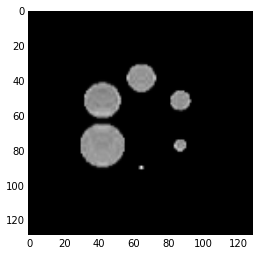

In [14]:
imshow(a.data[64,:,:],cmap='gray')

#### That was easy! And it's so fast! 

#### Can it be used with a PET scanner in real life? Yes,  we use Occiput.io with our scanners at the Martinos Center. While we work on preparing the documentation, email us your questions:  occiput@nmr.mgh.harvard.edu 
#### Does it take into account randoms, attenuation and scatter? Yes. 
#### Can it be used to test new scanner geometries? Yes. Occiput is extremely flexible, we are preparing more demos to show you how easy it is adapt it to new geometries. 